### Why Seaborn?

- provides a layer of abstraction hence simpler to use
- better aesthetics
- more graphs included

---

### Seaborn Roadmap

Types of Functions

- Figure Level
- Axis Level

Main Classification

- Relational Plot
- Distribution Plot
- Categorical Plot
- Regression Plot
- Matrix Plot
- Multiplots

https://seaborn.pydata.org/api.html

---

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### 1. Relational Plot

- to see the statistical relation between 2 or more variables.
- Bivariate Analysis

Plots under this section

- scatterplot
- lineplot

#### 1.1 Scatterplot

In [6]:
tips = sns.load_dataset('tips')
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


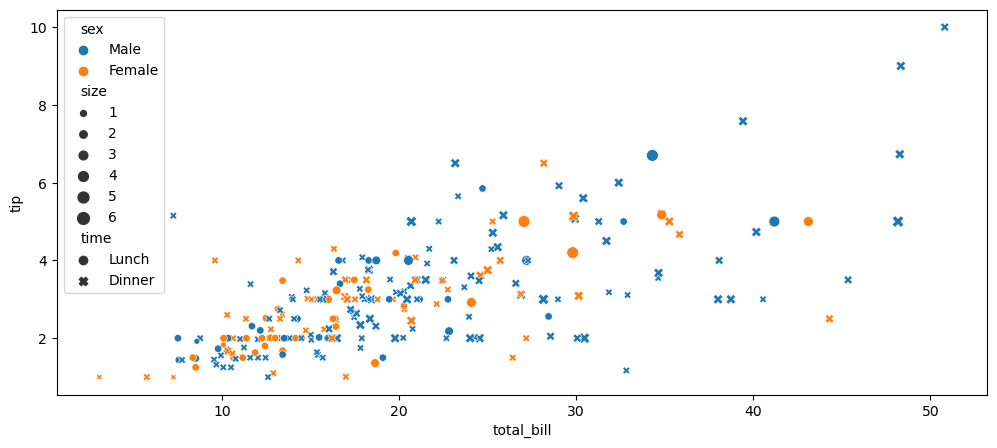

In [10]:
# scatter plot -> axes level function
fig = plt.figure(figsize=(12,5))
sns.scatterplot(data=tips, x='total_bill', y='tip',hue='sex',style='time',size='size')
plt.show()

<Figure size 1200x500 with 0 Axes>

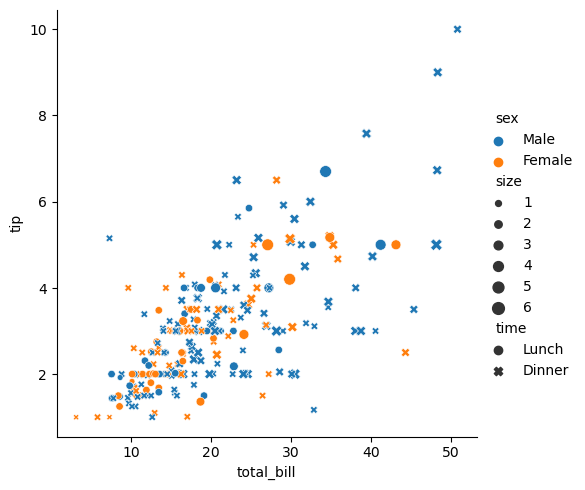

In [11]:
# relplot -> figure level -> square shape
fig = plt.figure(figsize=(12,5))
sns.relplot(data=tips, x='total_bill', y='tip', kind='scatter',hue='sex',style='time',size='size')
plt.show()

#### 1.2 Line Plot

In [12]:
# line plot
gap = px.data.gapminder()
temp_df = gap[gap['country'] == 'India']
temp_df.head(2)

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
696,India,Asia,1952,37.373,372000000,546.565749,IND,356
697,India,Asia,1957,40.249,409000000,590.061996,IND,356


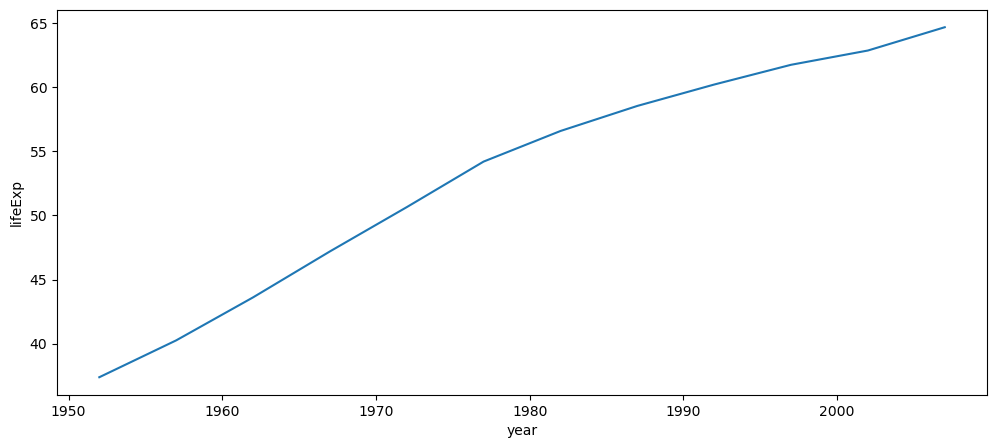

In [14]:
# axes level function
fig = plt.figure(figsize=(12,5))
sns.lineplot(data=temp_df, x='year', y='lifeExp')
plt.show()

<Figure size 1200x500 with 0 Axes>

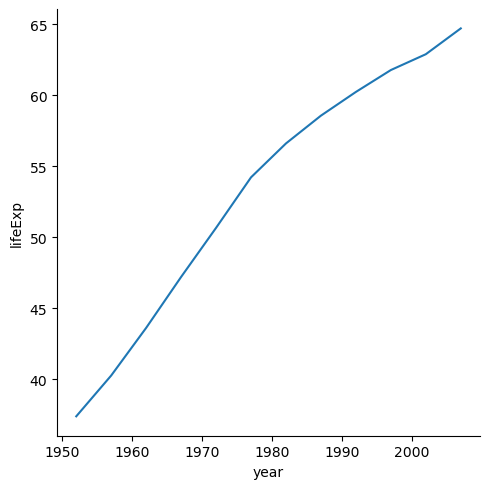

In [17]:
# using relpplot
fig = plt.figure(figsize=(12,5))
sns.relplot(data=temp_df, x='year', y='lifeExp', kind='line')
plt.show()

In [18]:
# hue -> style
temp_df = gap[gap['country'].isin(['India','Brazil','Germany'])]
temp_df.head(2)

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
168,Brazil,Americas,1952,50.917,56602560,2108.944355,BRA,76
169,Brazil,Americas,1957,53.285,65551171,2487.365989,BRA,76


<Figure size 1200x500 with 0 Axes>

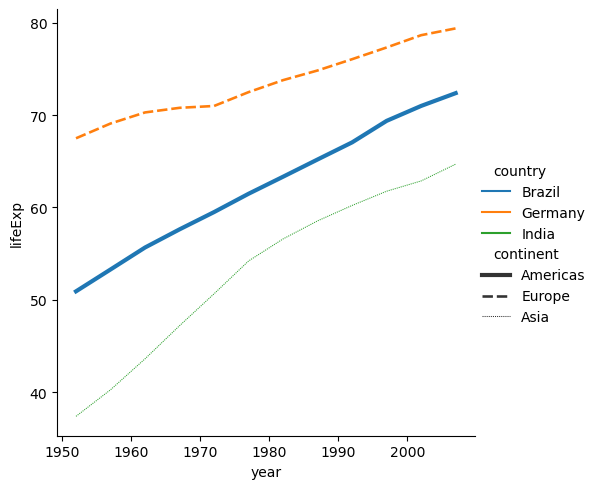

In [19]:
fig = plt.figure(figsize=(12,5))
sns.relplot(kind='line', data=temp_df, x='year', y='lifeExp', hue='country', style='continent', size='continent')

<Axes: xlabel='year', ylabel='lifeExp'>

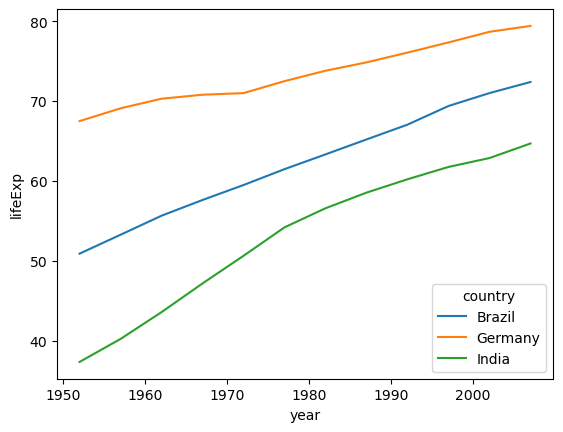

In [20]:
sns.lineplot(data=temp_df, x='year', y='lifeExp', hue='country')

#### 1.3 Facet plot

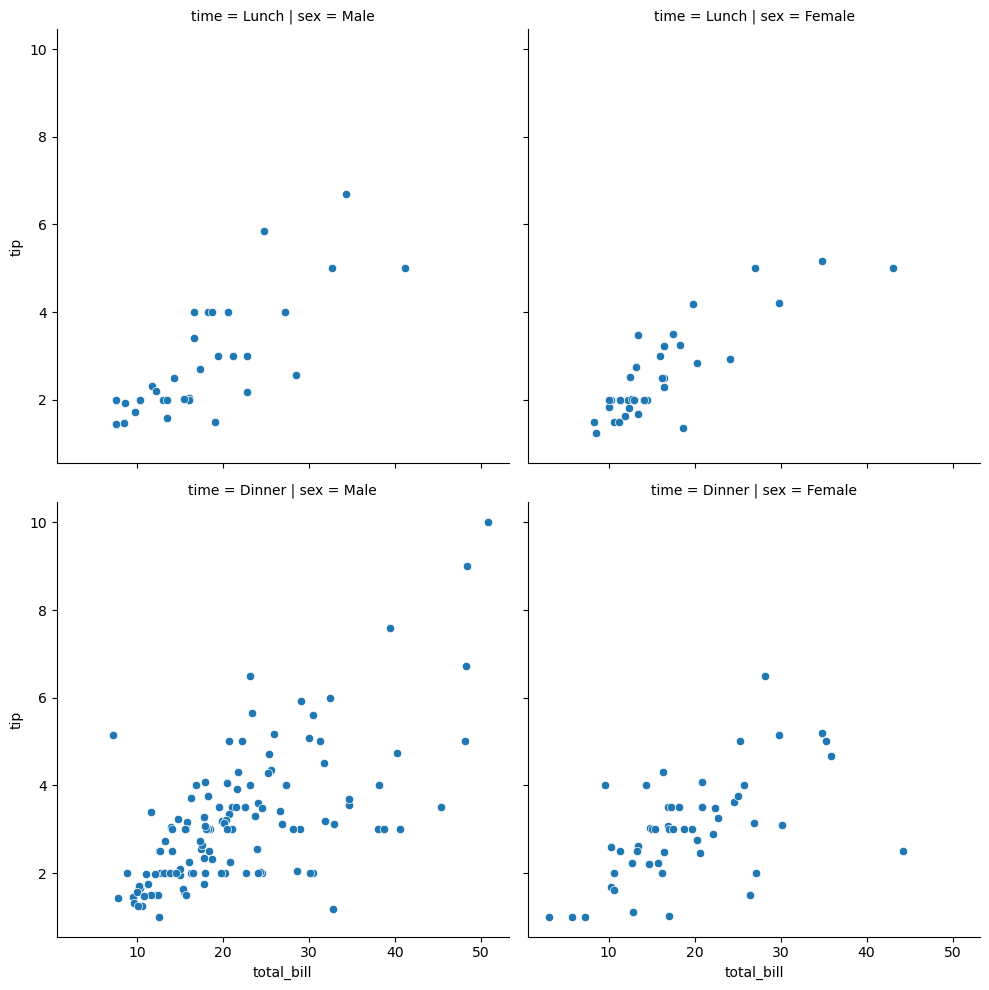

In [23]:
# facet plot -> figure level function -> work with relplot
# it will not work with scatterplot and lineplot
sns.relplot(data=tips, x='total_bill', y='tip', kind='scatter', col='sex', row='time')

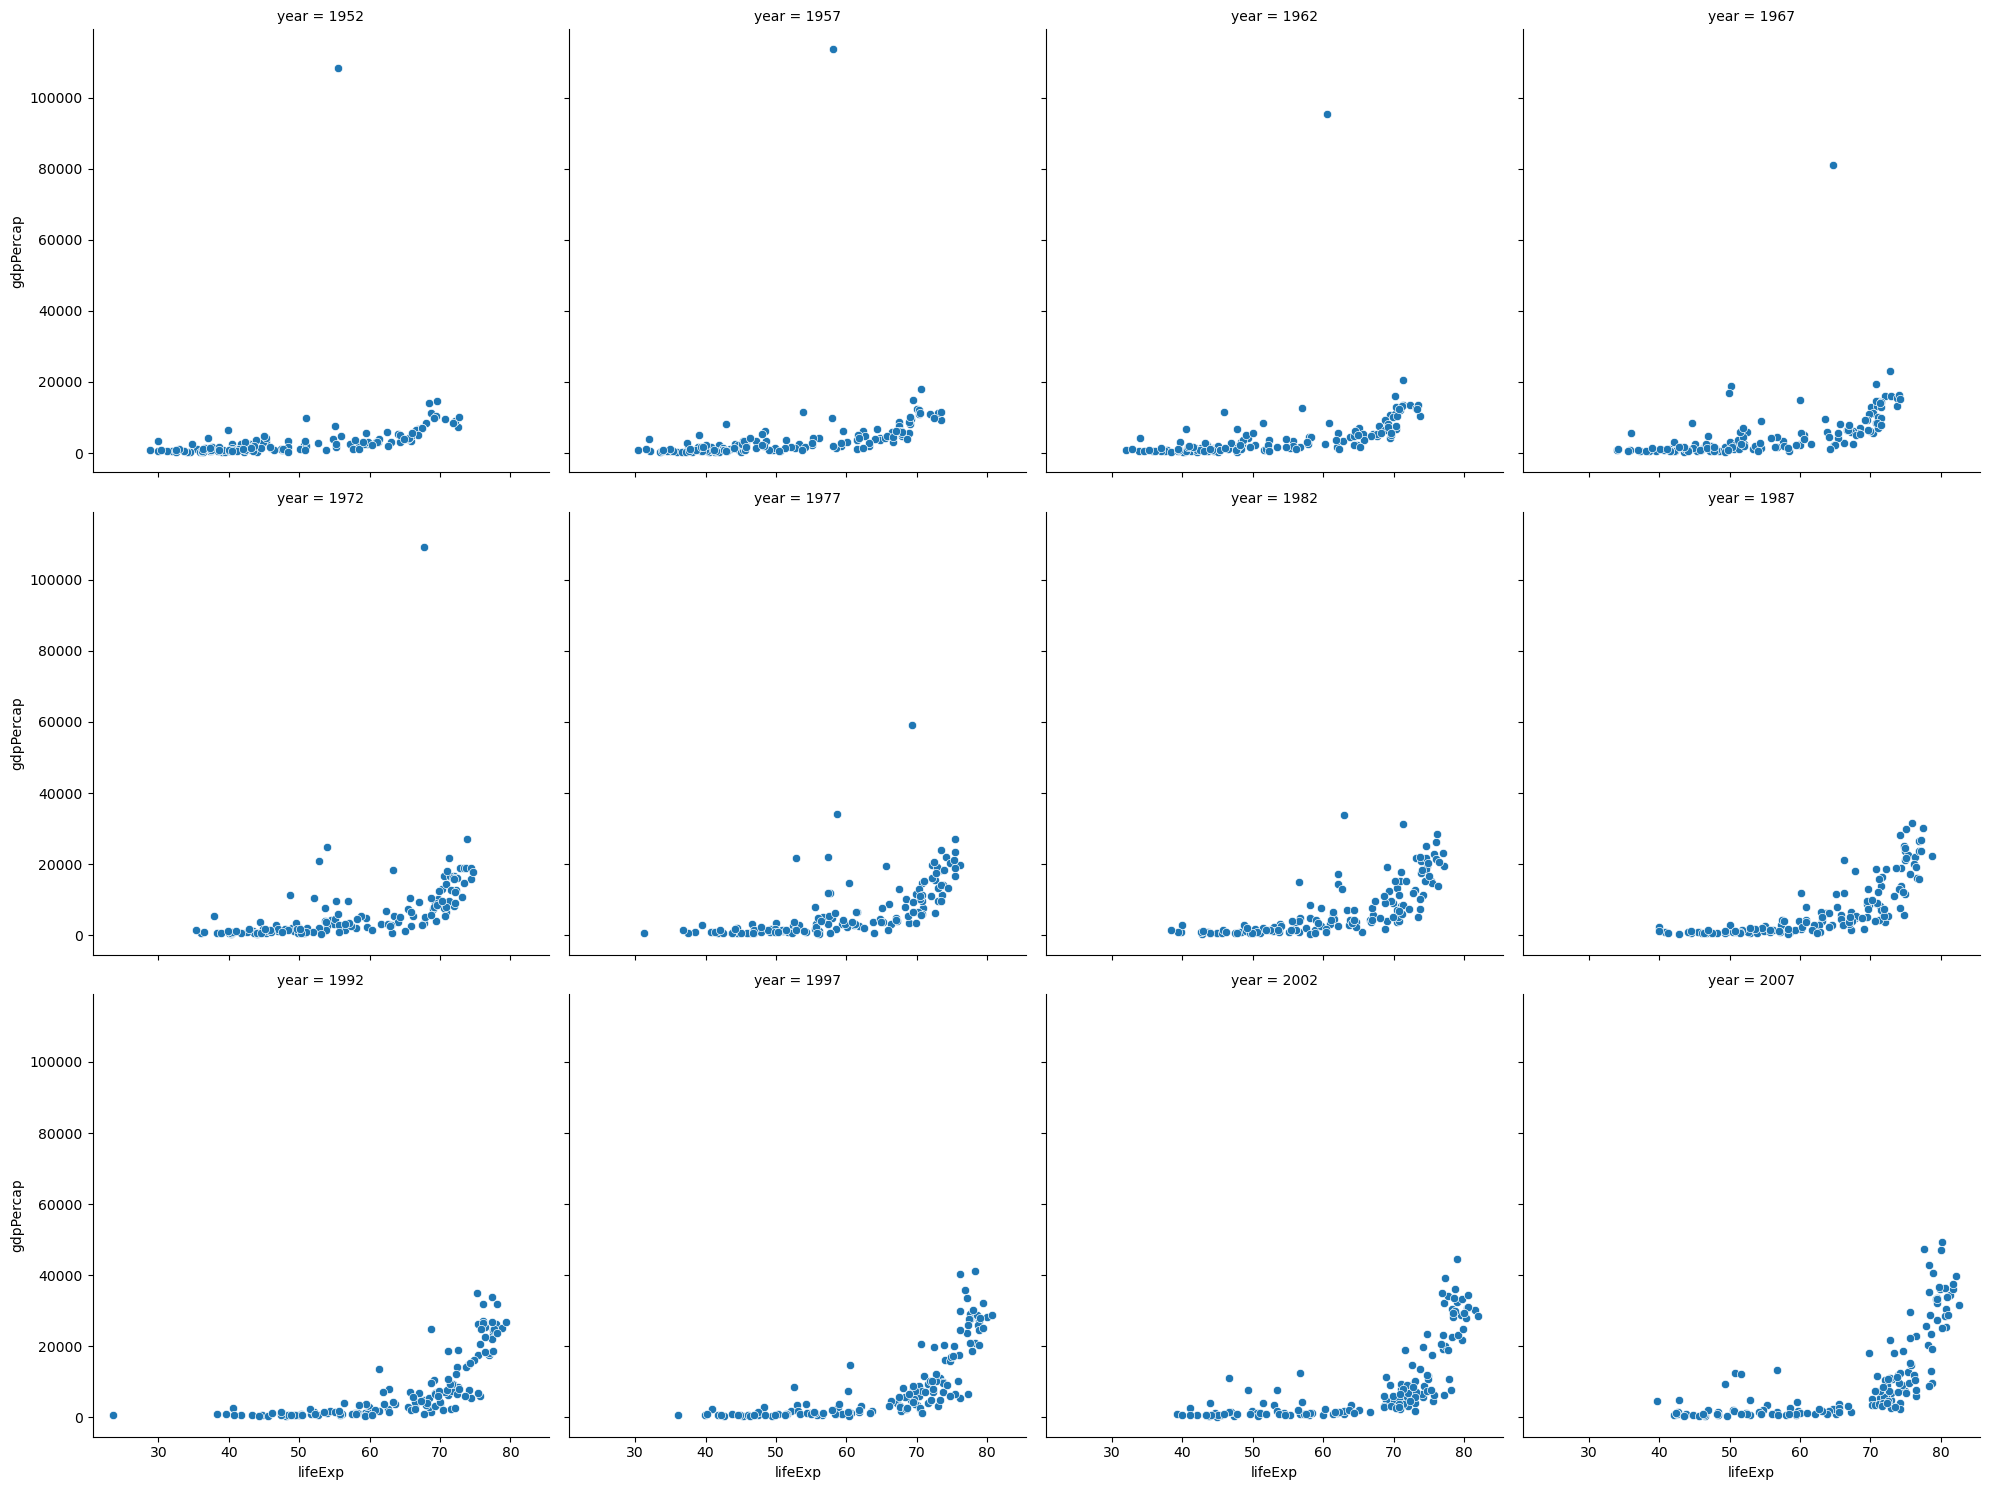

In [24]:
# col wrap
sns.relplot(data=gap, x='lifeExp', y='gdpPercap', kind='scatter', col='year', col_wrap=4)

AttributeError: PathCollection.set() got an unexpected keyword argument 'col'

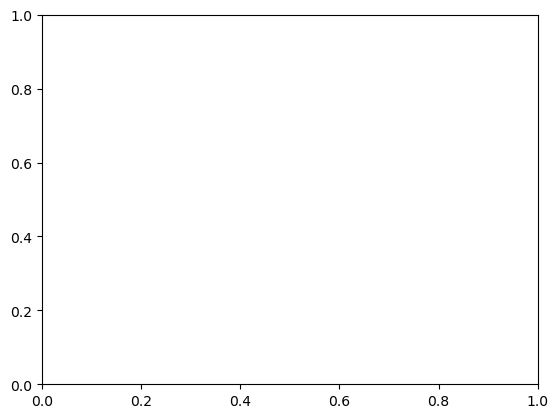

In [25]:
# Facet plot doesnot work with axes level plot
sns.scatterplot(data=tips, x='total_bill', y='tip', col='sex', row='day')

---

### 2. Distribution Plots

- used for univariate analysis
- used to find out the distribution
- Range of the observation
- Central Tendency
- is the data bimodal?
- Are there outliers?

Plots under distribution plot

- histplot
- kdeplot
- rugplot

#### 2.1. Histplot

In [26]:
# figure level -> displot
# axes level -> histplot -> kdeplot -> rugplot

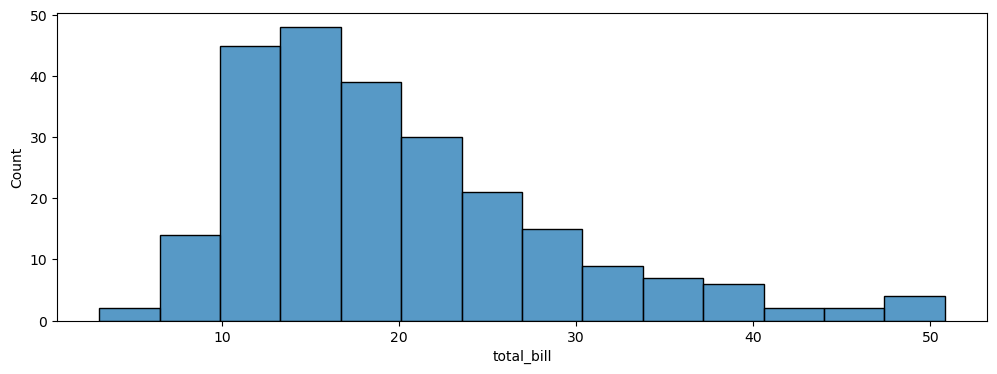

In [27]:
# plotting univariate histogram
fig = plt.figure(figsize=(12,4))
sns.histplot(data=tips, x='total_bill')
plt.show()

<Figure size 1200x400 with 0 Axes>

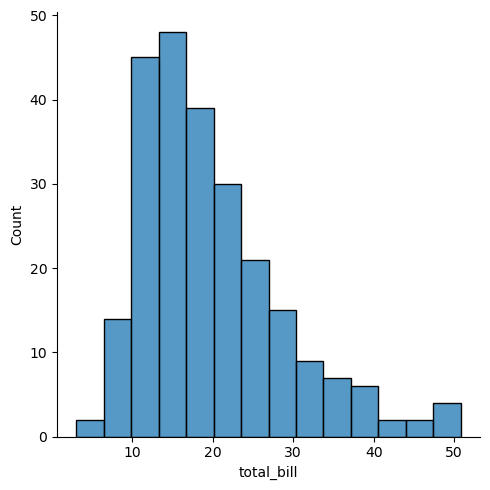

In [28]:
fig = plt.figure(figsize=(12,4))
sns.displot(data=tips, x='total_bill', kind='hist')

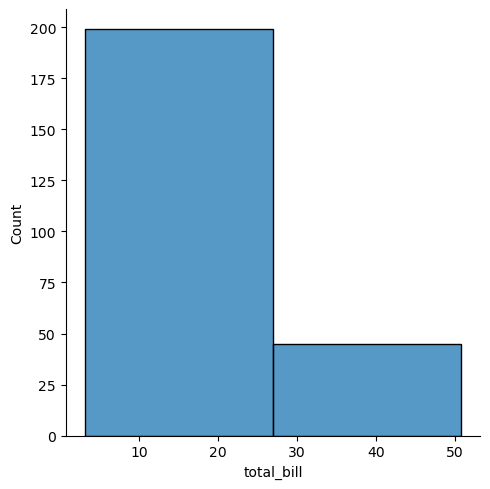

In [29]:
# bins parameter
sns.displot(data=tips, x='total_bill', kind='hist',bins=2)

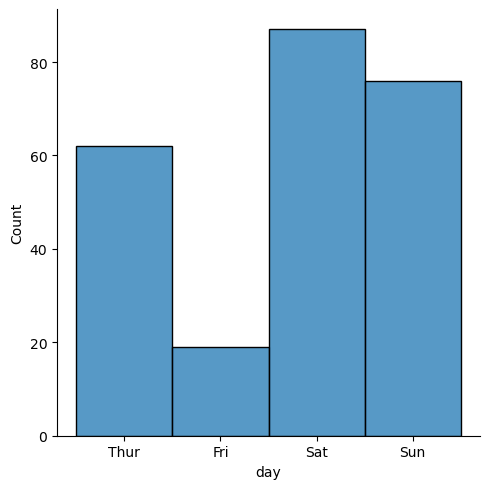

In [30]:
# It’s also possible to visualize the distribution of a categorical variable using the logic of a histogram.
# Discrete bins are automatically set for categorical variables

# countplot
sns.displot(data=tips, x='day', kind='hist')

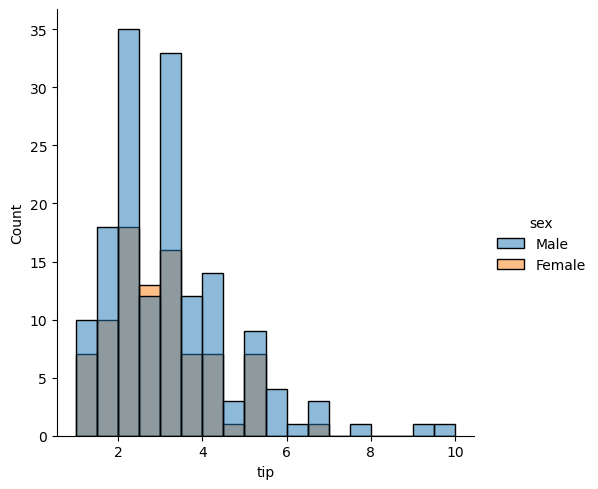

In [31]:
# hue parameter
sns.displot(data=tips, x='tip', kind='hist',hue='sex')

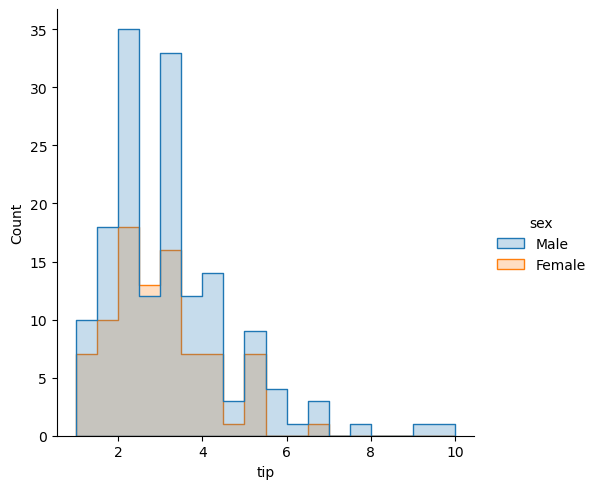

In [32]:
# element -> step
sns.displot(data=tips, x='tip', kind='hist',hue='sex',element='step')

In [33]:
titanic = sns.load_dataset('titanic')
titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


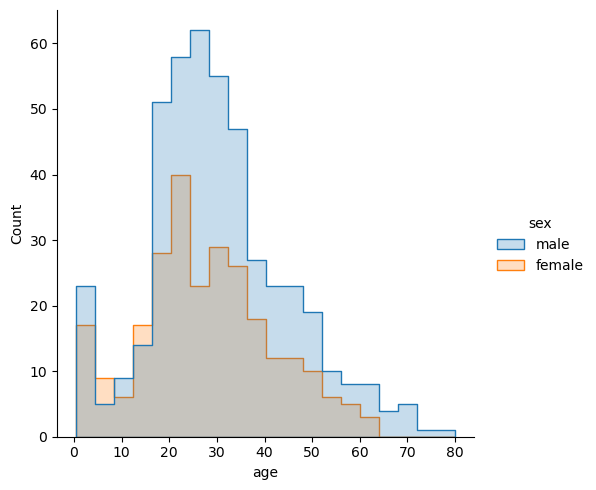

In [34]:
sns.displot(data=titanic, x='age', kind='hist',element='step',hue='sex')

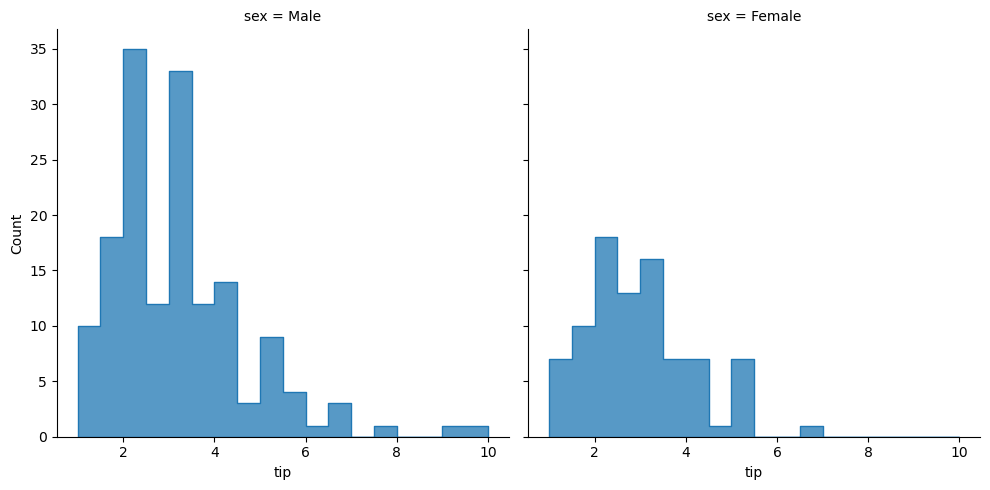

In [35]:
# faceting using col and row -> not work on histplot function
sns.displot(data=tips, x='tip', kind='hist',col='sex',element='step')

#### 2.2 KDEplot (Kernal Density Distribution)

<Axes: xlabel='total_bill', ylabel='Density'>

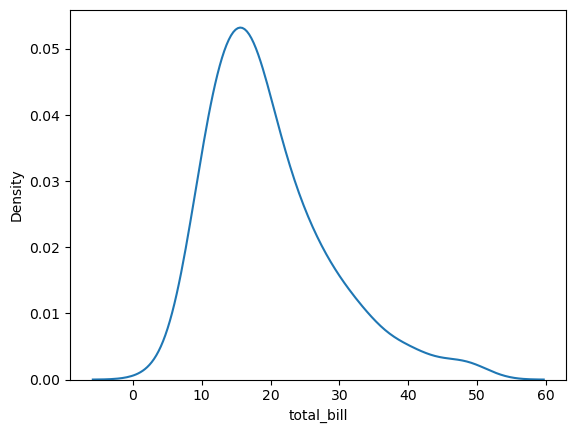

In [36]:
# kdeplot
# Rather than using discrete bins, a KDE plot smooths the observations with a Gaussian kernel, producing a continuous density estimate
sns.kdeplot(data=tips,x='total_bill')

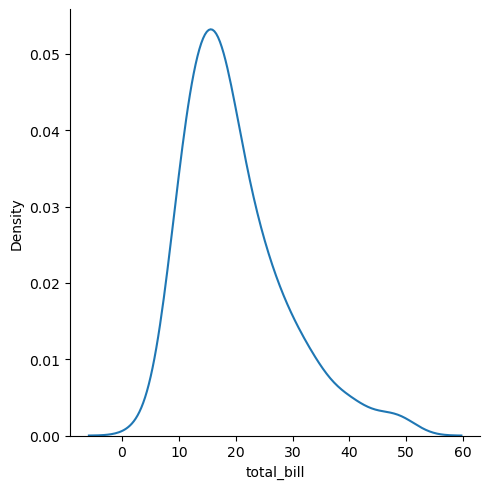

In [37]:
sns.displot(data=tips,x='total_bill',kind='kde')

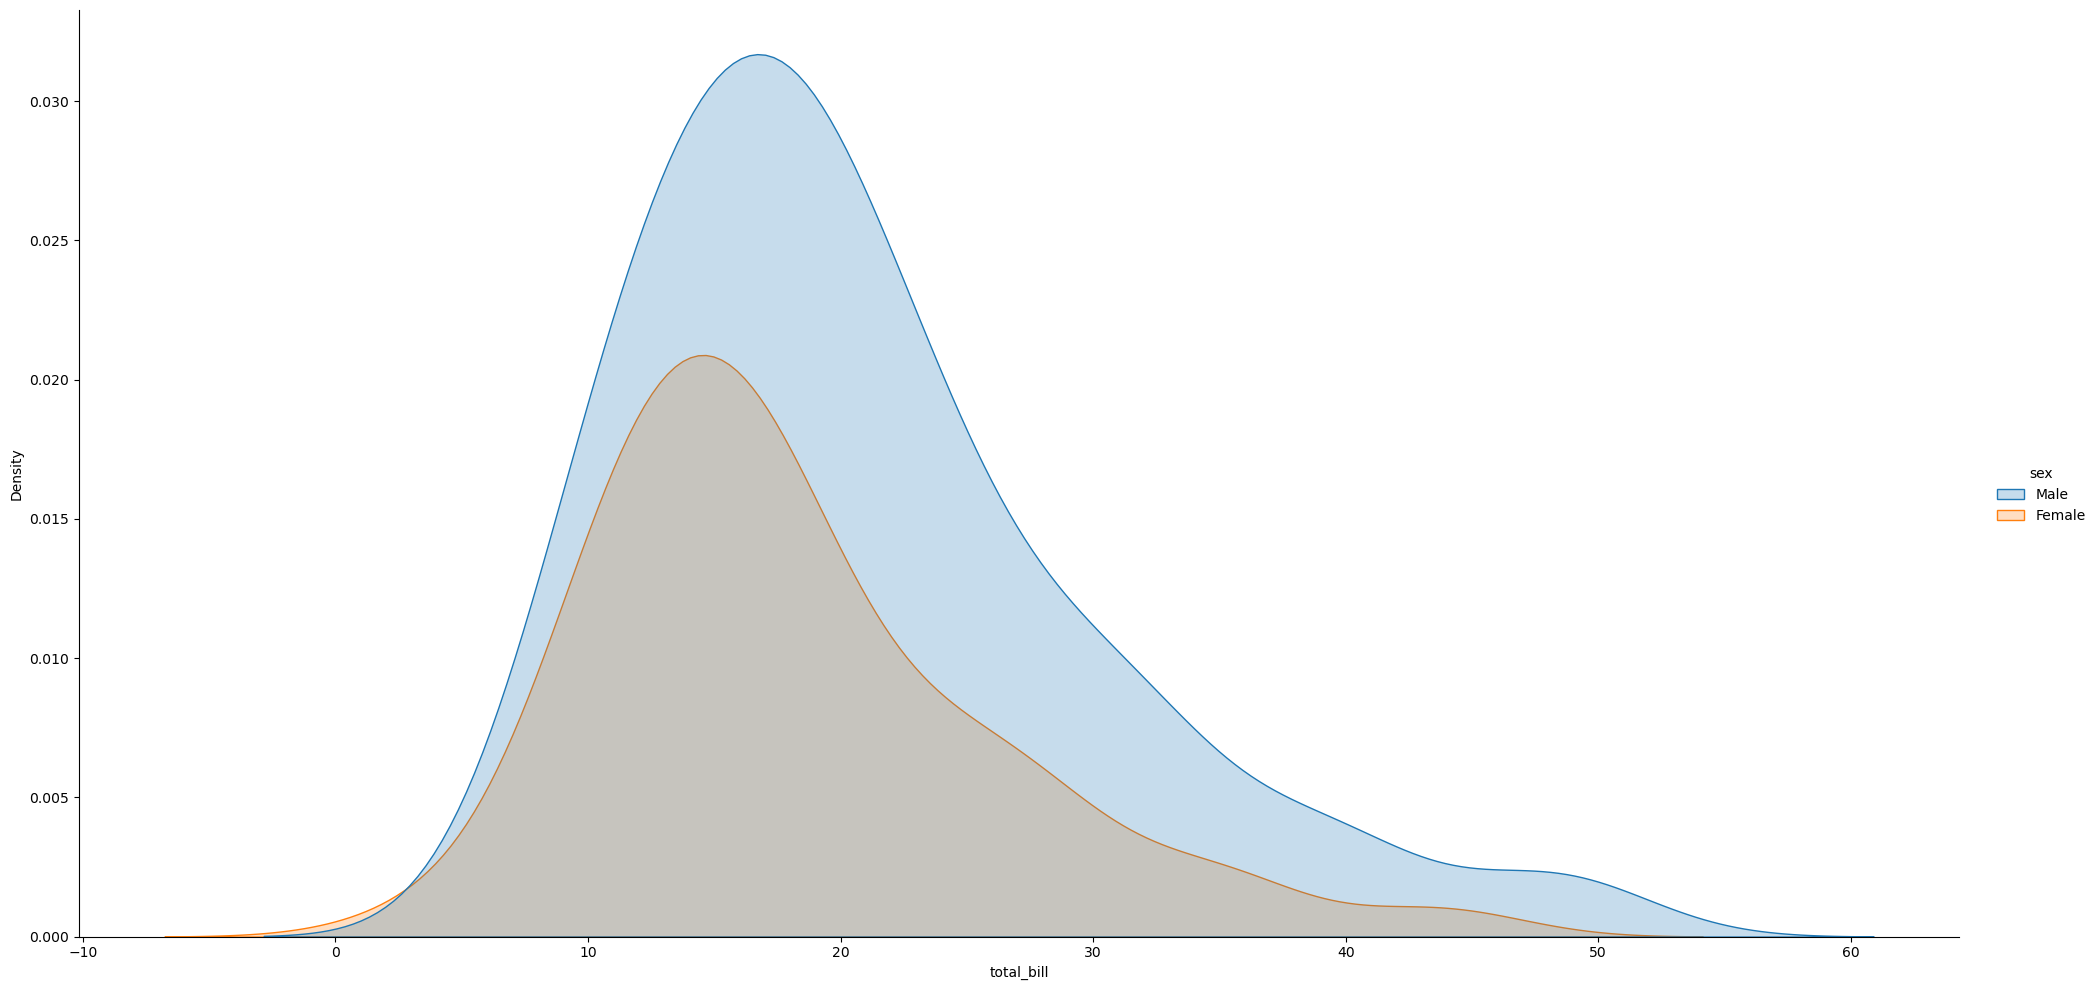

In [38]:
# hue -> fill
sns.displot(data=tips,x='total_bill',kind='kde',hue='sex',fill=True,height=10,aspect=2)

#### 2.3 Rugplot

<Axes: xlabel='total_bill', ylabel='Density'>

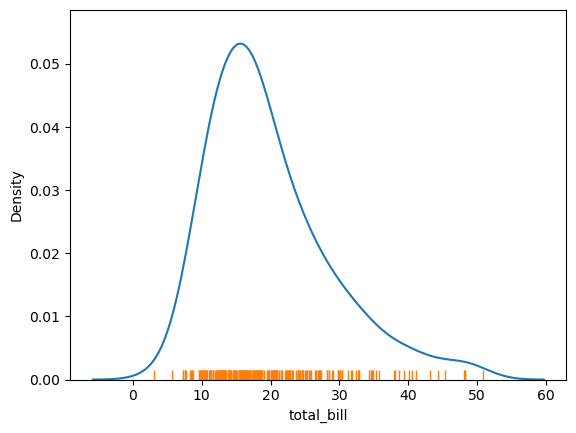

In [39]:
# Rugplot

# Plot marginal distributions by drawing ticks along the x and y axes.

# This function is intended to complement other plots by showing the location of individual observations in an unobtrusive way.
sns.kdeplot(data=tips,x='total_bill')
sns.rugplot(data=tips,x='total_bill')

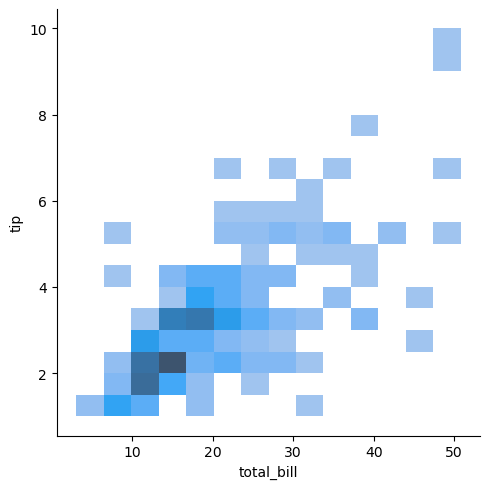

In [40]:
# Bivariate histogram
# A bivariate histogram bins the data within rectangles that tile the plot
# and then shows the count of observations within each rectangle with the fill color

# sns.histplot(data=tips, x='total_bill', y='tip')
sns.displot(data=tips, x='total_bill', y='tip',kind='hist')

<Axes: xlabel='total_bill', ylabel='tip'>

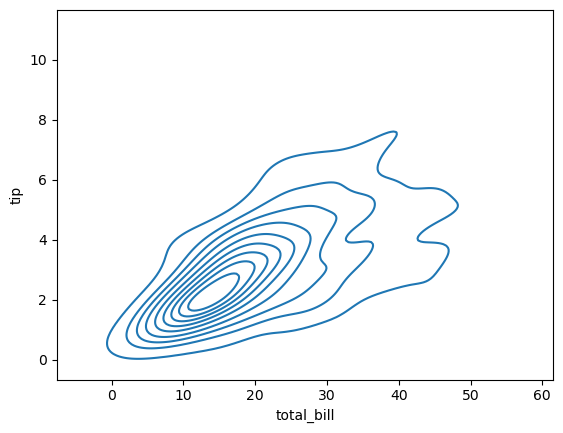

In [41]:
# Bivariate Kdeplot
# a bivariate KDE plot smoothes the (x, y) observations with a 2D Gaussian
sns.kdeplot(data=tips, x='total_bill', y='tip')

---

### 3. Matrix Plot

- Heatmap
- Clustermap

#### 3.1 Heatmap

<Axes: xlabel='year', ylabel='country'>

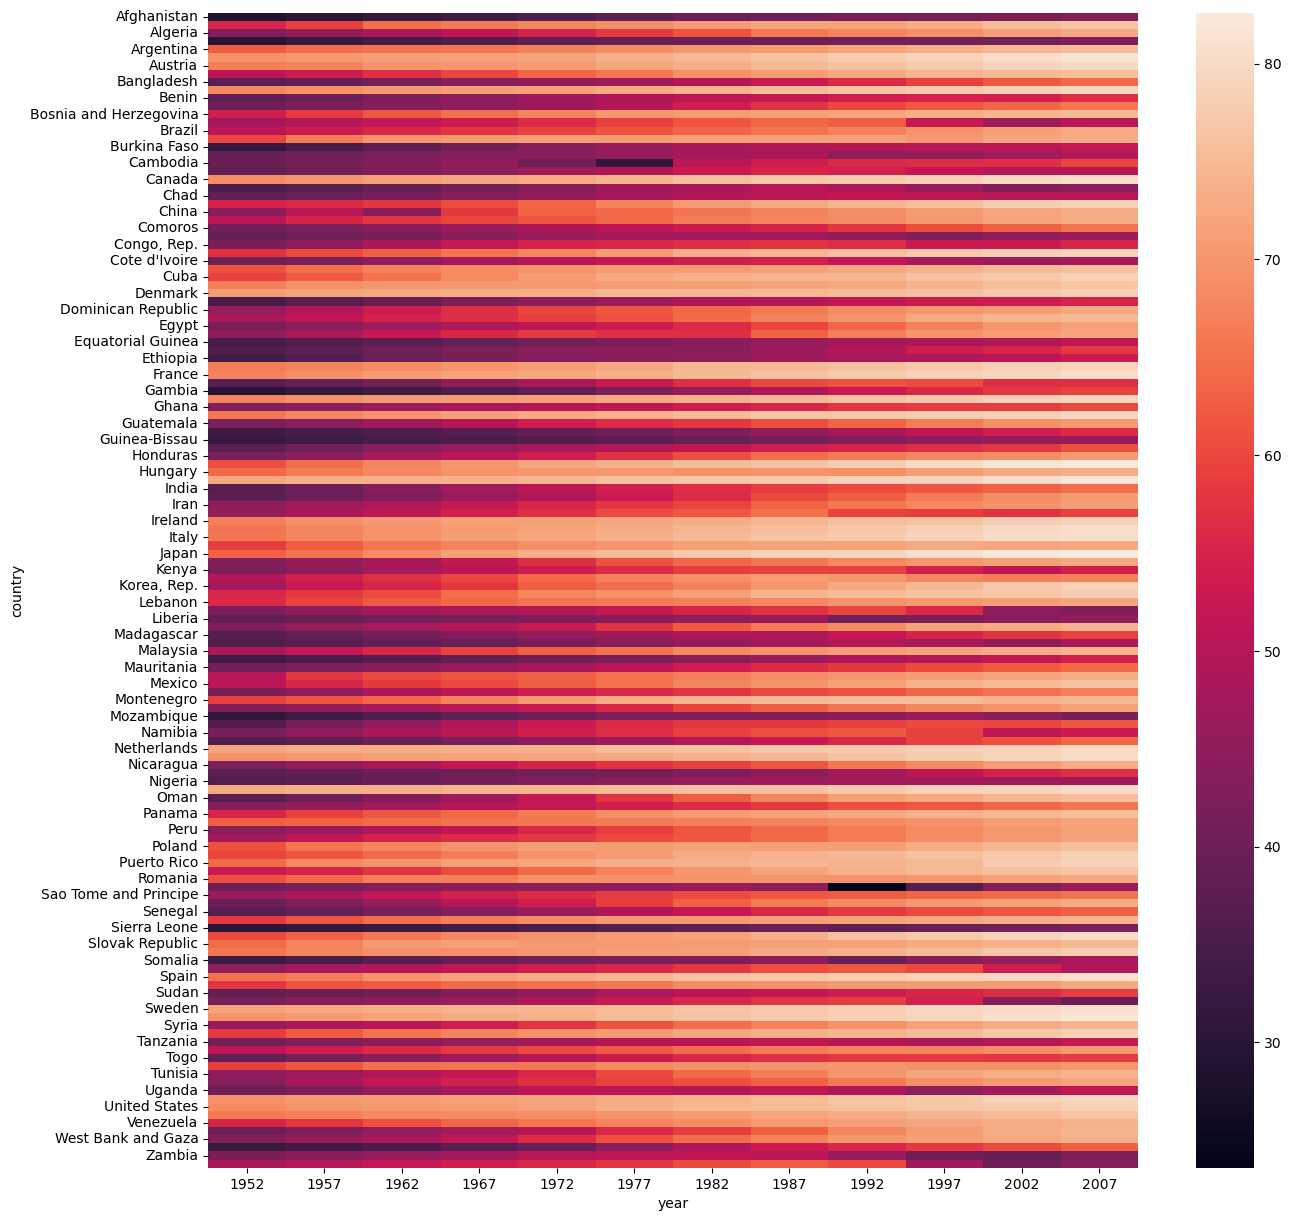

In [44]:
# Heatmap
# It does not have figure level function.
# Plot rectangular data as a color-encoded matrix
temp_df = gap.pivot(index='country',columns='year',values='lifeExp')

# axes level function
plt.figure(figsize=(15,15))
sns.heatmap(temp_df)

<Axes: xlabel='year', ylabel='country'>

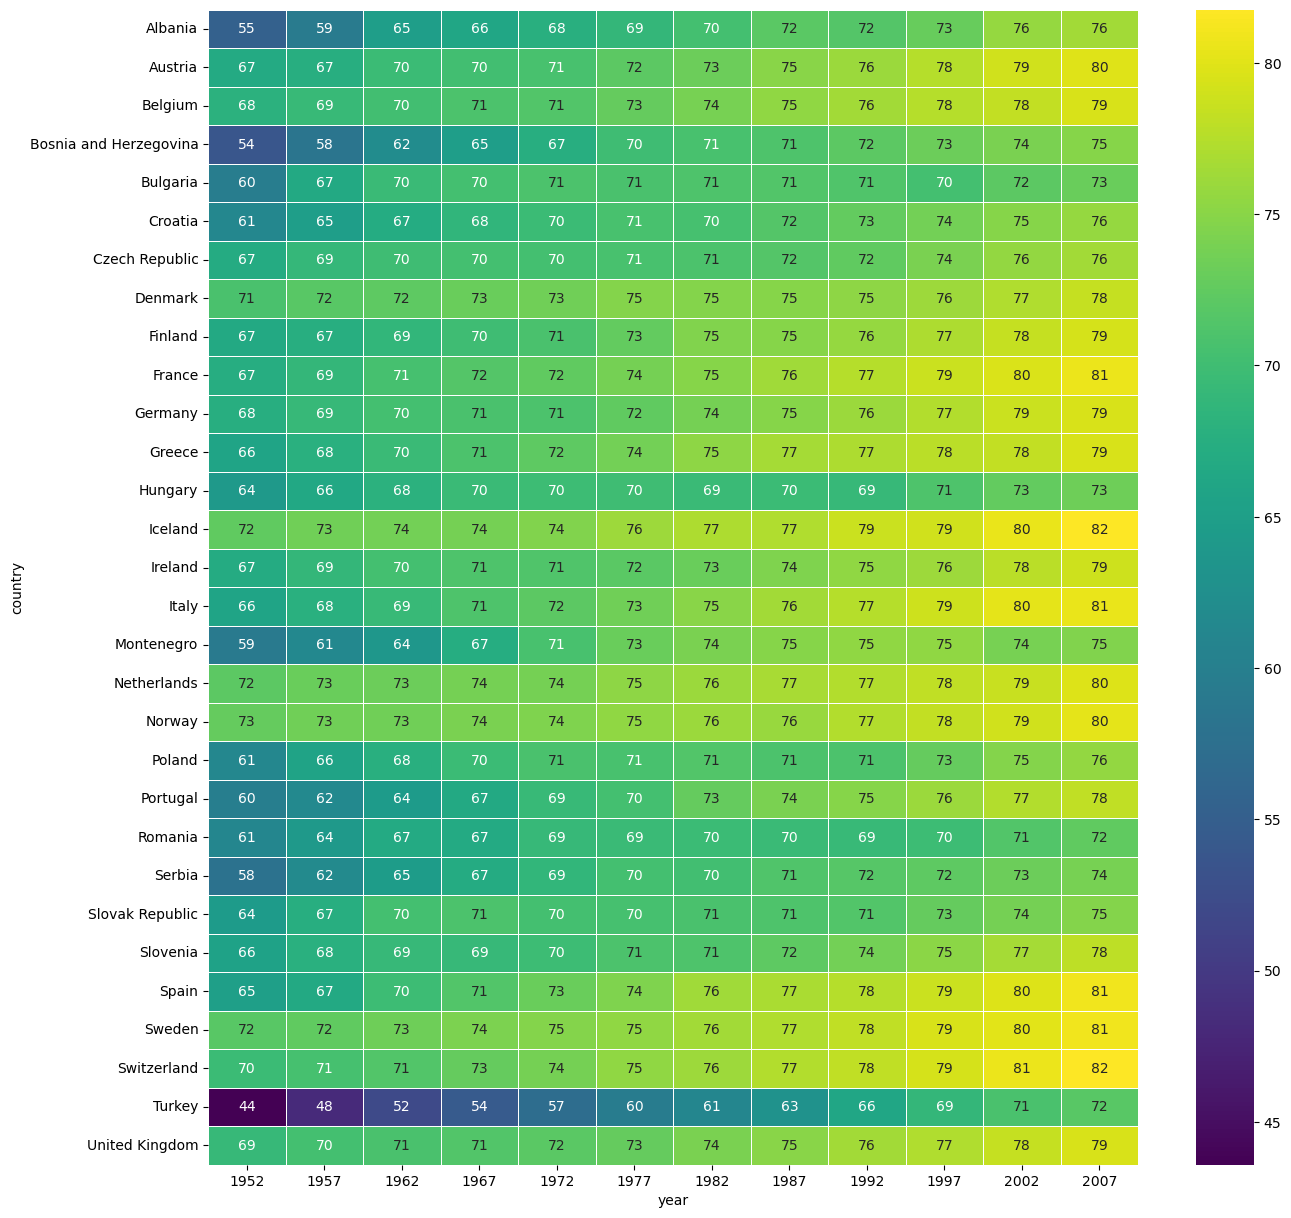

In [48]:
# annot
temp_df = gap[gap['continent'] == 'Europe'].pivot(index='country',columns='year',values='lifeExp')

plt.figure(figsize=(15,15))
sns.heatmap(temp_df,annot=True,linewidth=0.5, cmap='viridis')

In [49]:
# Clustermap
# Plot a matrix dataset as a hierarchically-clustered heatmap.
# This function requires scipy to be available.
# It also creates dendograms

iris = px.data.iris()
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1


#### 3.2 Clustermap

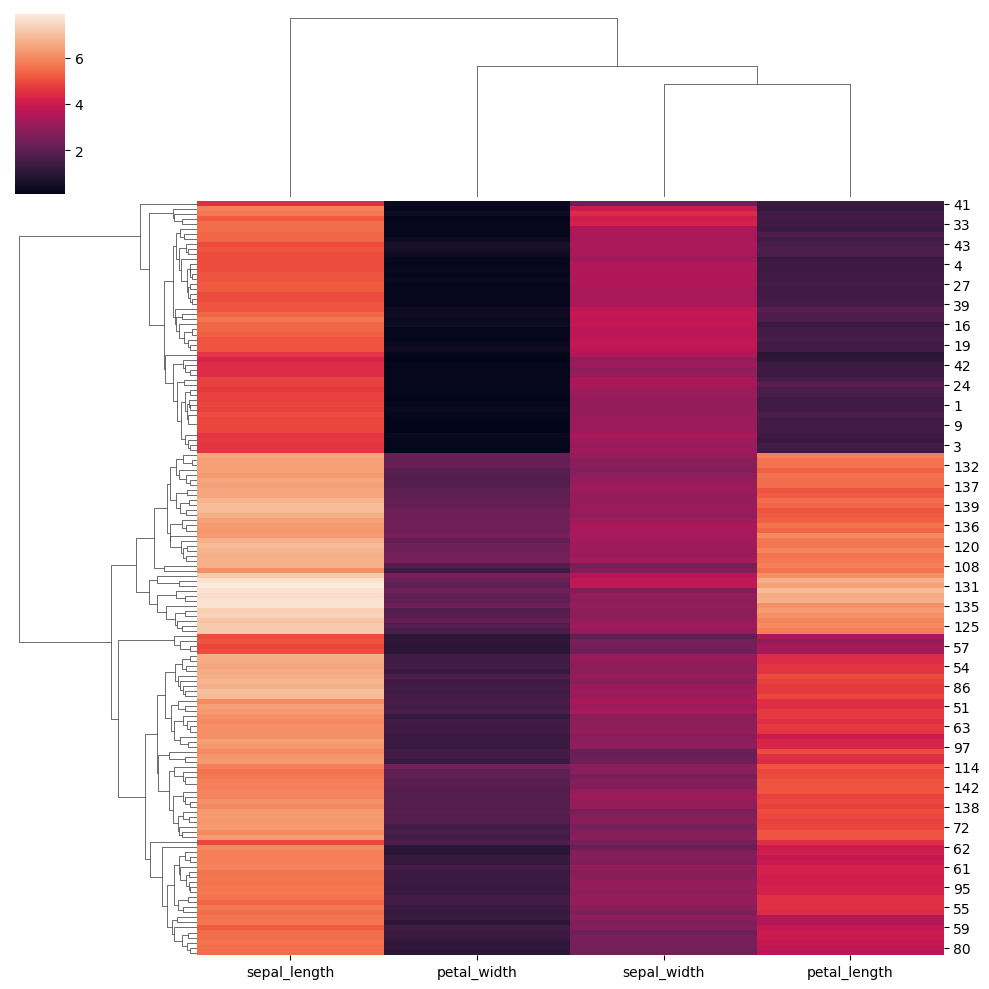

In [50]:
sns.clustermap(iris.iloc[:,[0,1,2,3]])